In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score
pd.set_option('display.max_columns',500)

In [2]:
data=pd.read_csv('../data/marketing_campaign_v3.csv',sep='\t')

In [3]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5211,1343,1944,2n Cycle,Married,466605.0,3,1,28-06-2013,101,173,178,752,72,60,190,8,16,8,5,1,0,1,1,1,0,0,3,11,1
5212,8461,1973,Master,Widow,462138.0,0,0,20-12-2013,86,515,197,998,79,15,110,14,2,9,4,7,1,1,1,0,1,1,3,11,0
5213,898,1893,Graduation,Widow,366270.0,0,1,12-02-2014,77,325,209,612,59,55,206,7,5,11,14,4,1,1,0,0,1,0,3,11,1
5214,9925,1972,2n Cycle,Together,497957.0,0,1,02-05-2014,87,275,199,406,77,57,178,7,12,1,6,4,1,0,1,0,0,1,3,11,0


People

ID: Customer's unique identifier
Year_Birth: Customer's birth year
Education: Customer's education level
Marital_Status: Customer's marital status
Income: Customer's yearly household income
Kidhome: Number of children in customer's household
Teenhome: Number of teenagers in customer's household
Dt_Customer: Date of customer's enrollment with the company
Recency: Number of days since customer's last purchase
Complain: 1 if the customer complained in the last 2 years, 0 otherwise
Products

MntWines: Amount spent on wine in last 2 years
MntFruits: Amount spent on fruits in last 2 years
MntMeatProducts: Amount spent on meat in last 2 years
MntFishProducts: Amount spent on fish in last 2 years
MntSweetProducts: Amount spent on sweets in last 2 years
MntGoldProds: Amount spent on gold in last 2 years
Promotion

NumDealsPurchases: Number of purchases made with a discount
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
Place

NumWebPurchases: Number of purchases made through the company’s website
NumCatalogPurchases: Number of purchases made using a catalogue
NumStorePurchases: Number of purchases made directly in stores
NumWebVisitsMonth: Number of visits to company’s website in the last month

In [4]:
data.shape

(5216, 29)

In [5]:
data.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [6]:
data.dropna(inplace=True)

In [7]:
data.reset_index(drop=True,inplace=True)

In [8]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [9]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [10]:
#Se seleccionan las variables continuas para clusterizar
var=['Kidhome',
       'Teenhome','Income','Recency','MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',]

In [11]:
X= data[var].copy()

In [12]:
X

,Kidhome,Teenhome,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,0,0,58138.0,58,635,88,546,172,88,88,3,8,10,4,7
1,1,1,46344.0,38,11,1,6,2,1,6,2,1,1,2,5
2,0,0,71613.0,26,426,49,127,111,21,42,1,8,2,10,4
3,1,0,26646.0,26,11,4,20,10,3,5,2,2,0,4,6
4,1,0,58293.0,94,173,43,118,46,27,15,5,5,3,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5211,3,1,466605.0,101,173,178,752,72,60,190,8,16,8,5,1
5212,0,0,462138.0,86,515,197,998,79,15,110,14,2,9,4,7
5213,0,1,366270.0,77,325,209,612,59,55,206,7,5,11,14,4
5214,0,1,497957.0,87,275,199,406,77,57,178,7,12,1,6,4


In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [14]:
sc = StandardScaler()
Xs=sc.fit_transform(X)

In [15]:
pca=PCA(n_components=2)

pca.fit(Xs)

PCA(n_components=2)

In [16]:
pca.explained_variance_ratio_

array([0.35814911, 0.11977095])

In [17]:
pca.explained_variance_ratio_.cumsum()

array([0.35814911, 0.47792006])

In [18]:
Xp = pd.DataFrame(pca.transform(Xs),columns=['p1','p2'])

In [19]:
Xp

,p1,p2
0,0.081921,-0.729412
1,3.674533,0.553690
2,2.075188,0.175272
3,3.962329,-0.015367
4,1.818915,-0.251583
...,...,...
5211,-2.739779,2.351161
5212,-1.710879,-1.978105
5213,-1.956549,-0.279260
5214,-1.388679,-0.031130


In [20]:
import seaborn as sns

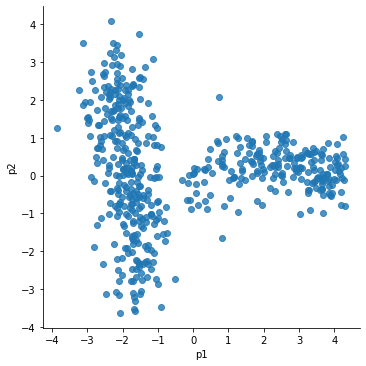

In [21]:

sns.lmplot(data=Xp.sample(frac=0.1),x='p1',y='p2',fit_reg=False)

In [22]:
import matplotlib.pyplot as plt

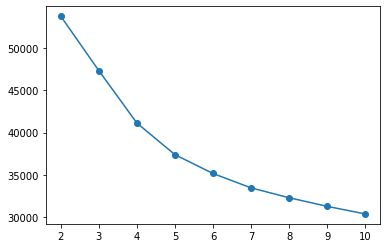

In [23]:
l = []
for k in range(2,11):
    km = KMeans(n_clusters=k,max_iter=100,random_state=10)
    km.fit(Xs)
    l.append((k,km.inertia_))
inercia = pd.DataFrame(l,columns=['k','inercia'])

plt.plot(inercia['k'],inercia['inercia'],marker='o')

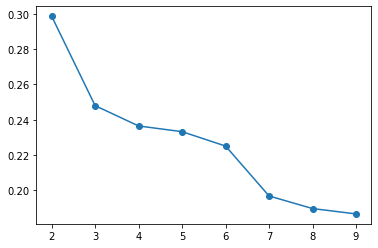

In [24]:
sil = pd.DataFrame(map(lambda k:(k,silhouette_score(Xs,
                                              KMeans(n_clusters=k,max_iter=1000,random_state=100).fit_predict(Xs))),
                 range(2,10)),columns=['k','sil'])
plt.plot(sil['k'],sil['sil'],marker='o')

In [42]:
cl= GaussianMixture(n_components=2, random_state=100)

In [43]:
cl.fit_predict(Xs)

array([1, 1, 1, ..., 0, 0, 0])

In [44]:
X['cl']=cl.fit_predict(Xs)

In [45]:
X['cl'].value_counts(1)

0    0.576304
1    0.423696
Name: cl, dtype: float64

<AxesSubplot:ylabel='cl'>

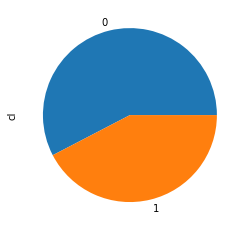

In [46]:
X['cl'].value_counts(1).plot.pie()

In [76]:
data_reclus=X[X['cl']==0].copy() #Tomamos el grupo mas grande

In [77]:
data_reclus

,Kidhome,Teenhome,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,cl
20,1,0,2447.0,42,1,1,1725,1,1,1,15,0,28,0,1,0
153,0,1,157243.0,98,20,2,1582,1,2,1,15,0,22,0,0,0
674,0,0,160803.0,21,55,16,1622,17,3,4,15,0,28,1,0,0
1636,0,0,157146.0,13,1,0,1725,2,1,1,0,0,28,0,1,0
1789,0,2,7144.0,92,81,4,33,5,2,291,0,23,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5211,3,1,466605.0,101,173,178,752,72,60,190,8,16,8,5,1,0
5212,0,0,462138.0,86,515,197,998,79,15,110,14,2,9,4,7,0
5213,0,1,366270.0,77,325,209,612,59,55,206,7,5,11,14,4,0
5214,0,1,497957.0,87,275,199,406,77,57,178,7,12,1,6,4,0


In [78]:
X_reclus=data_reclus[var].copy() #Nos quedamos con las continuas

In [79]:
X_reclus

,Kidhome,Teenhome,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
20,1,0,2447.0,42,1,1,1725,1,1,1,15,0,28,0,1
153,0,1,157243.0,98,20,2,1582,1,2,1,15,0,22,0,0
674,0,0,160803.0,21,55,16,1622,17,3,4,15,0,28,1,0
1636,0,0,157146.0,13,1,0,1725,2,1,1,0,0,28,0,1
1789,0,2,7144.0,92,81,4,33,5,2,291,0,23,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5211,3,1,466605.0,101,173,178,752,72,60,190,8,16,8,5,1
5212,0,0,462138.0,86,515,197,998,79,15,110,14,2,9,4,7
5213,0,1,366270.0,77,325,209,612,59,55,206,7,5,11,14,4
5214,0,1,497957.0,87,275,199,406,77,57,178,7,12,1,6,4


In [80]:
Xs_reclus=sc.fit_transform(X_reclus) #rescalamos

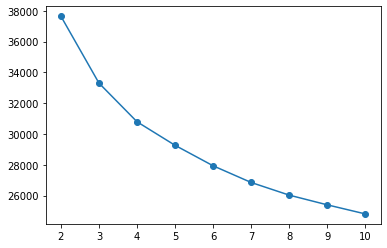

In [81]:
#No necesariamente se tiene que usar el mismo modelo que el cluster inicial
l = []
for k in range(2,11):
    km = KMeans(n_clusters=k,max_iter=100,random_state=10)
    km.fit(Xs_reclus)
    l.append((k,km.inertia_))
inercia = pd.DataFrame(l,columns=['k','inercia'])

plt.plot(inercia['k'],inercia['inercia'],marker='o')

In [82]:
cl_reclus= KMeans(n_clusters=3,random_state=200)

In [83]:
cl_reclus.fit_predict(Xs_reclus)

array([1, 1, 1, ..., 1, 2, 1], dtype=int32)

In [84]:
Xs_reclus

array([[ 0.20606969, -1.35214218, -5.99366977, ...,  4.41587567,
        -1.91026361, -0.93721458],
       [-0.89029402,  0.01225507, -3.8403933 , ...,  3.1234662 ,
        -1.91026361, -1.25860028],
       [-0.89029402, -1.35214218, -3.79087222, ...,  4.41587567,
        -1.70081466, -1.25860028],
       ...,
       [-0.89029402,  0.01225507, -0.93274116, ...,  0.75404884,
         1.02202169,  0.02694251],
       [-0.89029402,  0.01225507,  0.89907955, ..., -1.39996695,
        -0.65356991,  0.02694251],
       [-0.89029402,  1.37665231, -1.31946458, ...,  0.96945042,
        -0.65356991, -0.29444318]])

In [85]:
X_reclus['cl_reclus']=cl_reclus.fit_predict(Xs_reclus)

In [87]:
X_reclus['cl_reclus'].value_counts(1) #distribucion de los nuevos grupos

2    0.385562
1    0.334664
0    0.279774
Name: cl_reclus, dtype: float64

Al final nos quedarian 4 grupos. Se hace por negocio o cuando hay un pacman